#### 1. Import package:

In [1]:
# Data cleaning & EDA:
import numpy as np
import pandas as pd

# visaulization:
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats # hypothesis statistical methods

import statsmodels.formula.api as smf  # statsmodels

from sklearn.linear_model import LinearRegression  # both ML & stats models

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

#### 2. Import data:

In [3]:
cars_sales = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Python\Car_sales - 1734867571767.csv")
cars_sales

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


#### 3. EDA:

In [4]:
cars_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

#### 4. Seperate the Continuous & Categorical data:

In [32]:
cars_numeric = cars_sales.select_dtypes('float64')
cars_object = cars_sales.select_dtypes('object')


#### We need to Perform Data Cleaning on continuous data such that we detect & handle:

            1. Outliers
            2. Missing values
            3. Duplicates
            
            4. Look for the column which is acting as cartgerical.
            

#### 5. GET THE UDF:

In [6]:
# Function Definition:

def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

### HANDLING CONTINUOUS DATA:

#### 6. Get the Summary output for continous data:

In [7]:
summ1 = cars_numeric.apply(continuous_var_summary)
summ1

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,157,117,152,31,66,88,78,127,147,55,20,154
n_tot,157,157,157,157,157,157,157,157,157,157,157,157
n,157,121,155,156,156,156,156,156,155,156,154,155
nmiss,0,36,2,1,1,1,1,1,2,1,3,2
perc_miss,0.0,22.929936,1.273885,0.636943,0.636943,0.636943,0.636943,0.636943,1.273885,0.636943,1.910828,1.273885
sum,8320.698,2186.83,4245.567,477.5,29008.0,16768.0,11099.4,29225.6,523.594,2800.5,3672.0,11941.756636
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.15,187.34359,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
var,4628.002257,131.180007,205.969949,1.0913,3214.926385,58.389512,11.915419,180.412023,0.397532,15.115932,18.341567,632.153558


#### 7. Get the Summary for Categorical data:

In [26]:
cars_object.describe()

,Manufacturer,Model,Vehicle_type,Latest_Launch
count,157,157,157,157
unique,30,156,2,130
top,Dodge,Neon,Passenger,10-05-2012
freq,11,2,116,2


#### 8. Treat the Outliers:

        using .clip(lower = , upper = )

In [18]:
cars_numeric = cars_numeric.apply(lambda x : x.clip(lower = x.quantile(0.01), 
                                     upper = x.quantile(0.99)) 
                  )
cars_numeric

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225000,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.072975,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,18.072975,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,18.072975,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,18.072975,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


#### 9. Treat missing values:
            
            using .fillna()<----mean

In [19]:
cars_numeric = cars_numeric.apply(lambda x : x.fillna(x.mean()))
cars_numeric

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225000,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.072975,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,18.072975,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,18.072975,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,18.072975,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [20]:
# The summary after taking care of outliers & missing values:
cars_numeric.apply(continuous_var_summary)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,155,116,151,30,65,88,77,126,146,55,20,153
n_tot,157,157,157,157,157,157,157,157,157,157,157,157
n,157,157,157,157,157,157,157,157,157,157,157,157
nmiss,0,0,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,8025.5292,2830.716907,4290.47123,478.872897,29095.708718,16867.447179,11173.61,29411.21159,530.526292,2817.811923,3731.532468,12065.90351
mean,51.11802,18.030044,27.327842,3.050146,185.322985,107.435969,71.16949,187.332558,3.379148,17.947847,23.767723,76.852889
std,57.722699,9.758199,13.966065,0.979106,52.633251,7.39684,3.37926,13.073761,0.617754,3.80672,3.956172,23.690228
var,3331.909938,95.222439,195.050964,0.958649,2770.25912,54.713239,11.419397,170.923231,0.38162,14.491116,15.651297,561.226923


### HANDLING CATEGORICAL DATA:

#### 10. Cardinality of each categorical column: 

In [33]:
cars_object.nunique()

Manufacturer      30
Model            156
Vehicle_type       2
Latest_Launch    130
dtype: int64

#### 11. Create Dummy variables on Vehicle_type & Manufacturer:

        We will drop model & LAtest_launch as their cardinality is too high.
        
        - Dummy variables can be craeted using pd.get_dummies().

In [34]:
cars_object = pd.get_dummies(cars_object.loc[: , ['Manufacturer', 'Vehicle_type'] ], drop_first= True, dtype='float' )
cars_object

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


#### 12. Combining the Continuous & Catgeorical data:
        
        using pd.concat(axis = 1)

In [35]:
cars_new = pd.concat([cars_numeric, cars_object], axis = 1)
cars_new

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,14.114,18.225000,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.072975,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
153,15.245,18.072975,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
154,17.531,18.072975,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
155,3.493,18.072975,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


#### What is the y variables?

* Sales_in_thousands

        but it must follow the normal distribution, if not, then we need to transform it such that the transformed Sales follow or tend to follow normal distribution.



In [36]:
cars_new.rename(columns = {'Manufacturer_Mercedes-B' : 'Manufacturer_Mercedes_B'}, inplace = True) #to follow INC rules

In [37]:
cars_new

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,14.114,18.225000,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.072975,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
153,15.245,18.072975,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
154,17.531,18.072975,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
155,3.493,18.072975,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### LR - based on many assumptions, 10 of them are critical:**

1. All variables( x variables & y variable) must follow Normal distribution. If not all, then atleast y should follow the Normal distribution.

2. All x variables must be linear to y, otherwise straight line will not be possible for the slope.

3. The number of observations(rows) > The number of variables(columns)

4. X variables should be independent.

In [38]:
cars_new.Sales_in_thousands.skew()

1.9924932920508793

C:\Users\user\AppData\Local\Temp\ipykernel_10656\2167074609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_new.Sales_in_thousands)


<Axes: xlabel='Sales_in_thousands', ylabel='Density'>

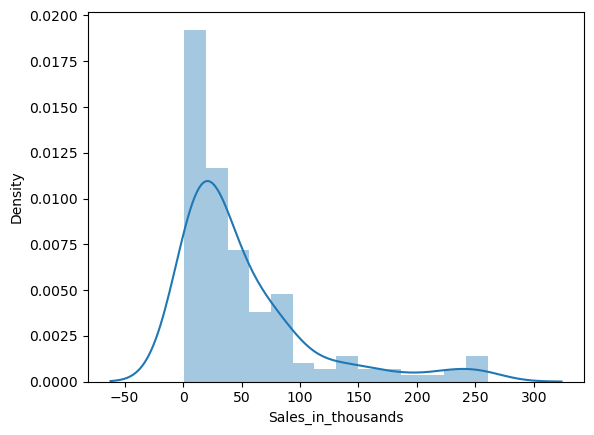

In [43]:
sns.distplot(cars_new.Sales_in_thousands)

* Since the y_actual(SaleS_in_thousands) is not following the Normal Distribution, hence we need to transform the variable using np.log()

C:\Users\user\AppData\Local\Temp\ipykernel_10656\2530140438.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( np.log(cars_new.Sales_in_thousands) )


<Axes: xlabel='Sales_in_thousands', ylabel='Density'>

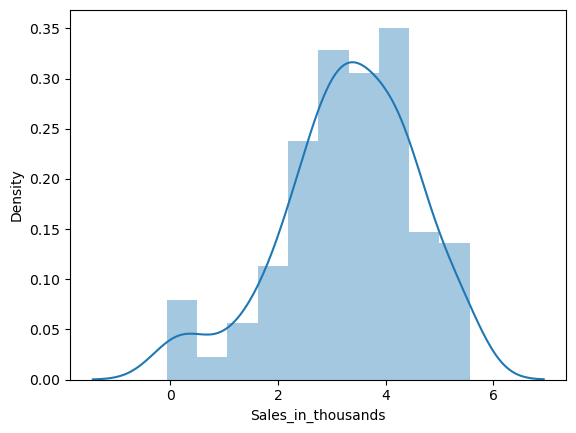

In [44]:
sns.distplot( np.log(cars_new.Sales_in_thousands) )

In [45]:
np.log(cars_new.Sales_in_thousands).skew()

-0.5925861100519006

In [46]:
cars_new.loc[:, 'ln_Sales_in_thousands'] = np.log(cars_new.Sales_in_thousands)
cars_new.head(3)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_Sales_in_thousands
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.828437
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.673360
2,14.114,18.225,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.647167


* **Now the y_actual is "ln_Sales_in_thousands".**

#### 14. Check the co-relations among the variables:

<Axes: >

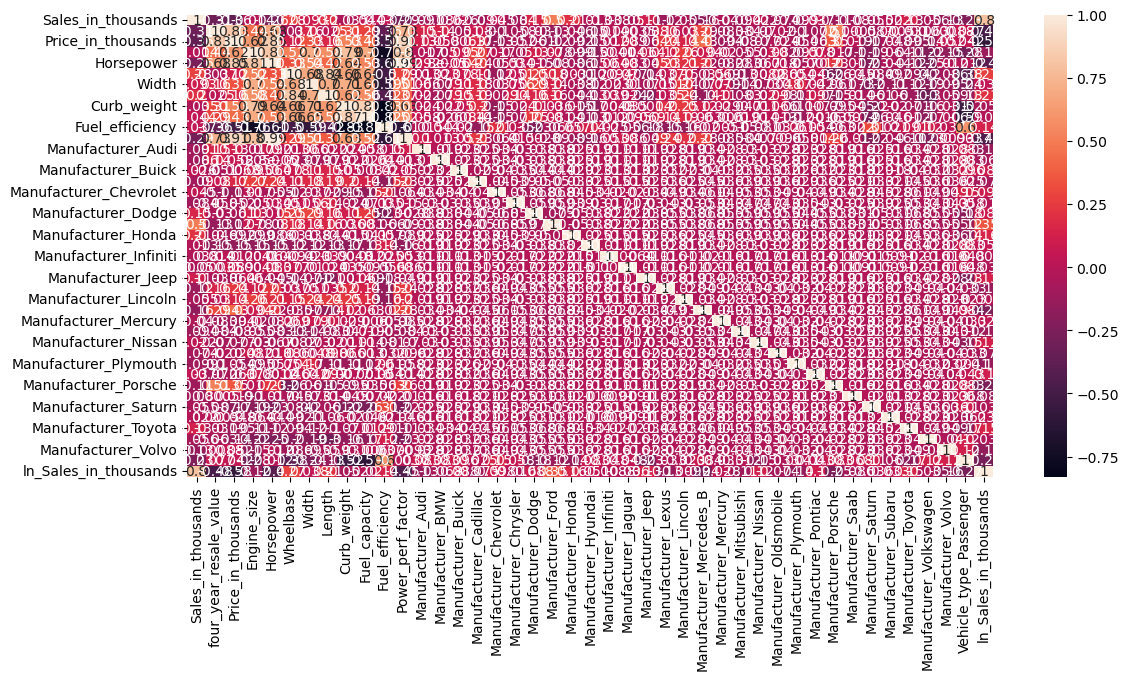

In [47]:
plt.figure(figsize= (13,6))
sns.heatmap( cars_new.corr(), annot = True )

In [49]:
cars_new.corr().to_excel(r'C:\Users\user\OneDrive\Documents\Python\corr.xlsx')

#### 15. Variable Selection:

* It involves 2 steps:
        
        a. Feature Importance:
                        
                        f_regression()---->f_score, p_values
                                
                                The impotant feature must have p-values < 0.05, if not, then atleast < 0.1
                                
                        
        b. Multi-Colinearity Check:
                
                 all x variables will be compared will be among themselves:
                        
                        patsy---> dmatrices, vif()
                                    vif()----> vif_value
                                    
                                    
* **This steps needs to be done before Defining the model.**

##### a. Feature Importance:

In [50]:
from sklearn.feature_selection import f_regression

In [51]:
features = cars_new.columns.difference(['Sales_in_thousands','ln_Sales_in_thousands' ]) #x-variables
features

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [52]:
# f_score, p_value = f_regression(X, y)

        # where X: x features & y: ln_Sales_in_thousands
    
f_score, p_value = f_regression(cars_new[features], cars_new.ln_Sales_in_thousands)

In [56]:
significant_features = pd.DataFrame([features, f_score, p_value]).T
significant_features.columns = ['Features', 'F_Score', 'P_Values']
significant_features

,Features,F_Score,P_Values
0,Curb_weight,0.41869,0.518548
1,Engine_size,2.301021,0.131326
2,Fuel_capacity,0.059209,0.808072
3,Fuel_efficiency,2.887083,0.091299
4,Horsepower,29.605047,0.0
5,Length,6.949996,0.009235
6,Manufacturer_Audi,2.874313,0.092011
7,Manufacturer_BMW,0.726643,0.395289
8,Manufacturer_Buick,1.196073,0.275805
9,Manufacturer_Cadillac,0.887999,0.347487


In [57]:
# only those features are significant whose p_values < 0.1.
features = list( significant_features.loc[ significant_features.P_Values < 0.1 , 'Features' ] )
features

['Fuel_efficiency',
 'Horsepower',
 'Length',
 'Manufacturer_Audi',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Mercedes_B',
 'Manufacturer_Plymouth',
 'Manufacturer_Porsche',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Power_perf_factor',
 'Price_in_thousands',
 'Vehicle_type_Passenger',
 'Wheelbase',
 'four_year_resale_value']

###### b. Multi-Colinearity Check:

* Tells relationship b/w x variables.
* No y variable is needed.
* Also we don't have intercept 'c'. Only X variables

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from patsy import dmatrices

In [59]:
# formula--->model_param = y ~ x1 + x2 +....

model_param = 'ln_Sales_in_thousands ~ ' + ' + '.join(features)
model_param

'ln_Sales_in_thousands ~ Fuel_efficiency + Horsepower + Length + Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + Power_perf_factor + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + four_year_resale_value'

In [67]:
y, X = dmatrices(model_param, data = cars_new, return_type= 'dataframe')

In [68]:
# For each X, calculate VIF and save in dataframe:

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range( X.shape[1] ) ]

features = list( vif.loc[ 1: , 'Features'])

features

['Fuel_efficiency',
 'Horsepower',
 'Length',
 'Manufacturer_Audi',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Mercedes_B',
 'Manufacturer_Plymouth',
 'Manufacturer_Porsche',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Power_perf_factor',
 'Price_in_thousands',
 'Vehicle_type_Passenger',
 'Wheelbase',
 'four_year_resale_value']

In [63]:
vif

,Features,VIF Factor
0,Intercept,644.058154
1,Fuel_efficiency,4.393539
2,Horsepower,214.842893
3,Length,5.666776
4,Manufacturer_Audi,1.073516
5,Manufacturer_Ford,1.091235
6,Manufacturer_Honda,1.092045
7,Manufacturer_Mercedes_B,1.722476
8,Manufacturer_Plymouth,1.181433
9,Manufacturer_Porsche,1.675094


* X.shape---> (157,17)
* X.shape[1]--> 17
* [ i for i in range(X.shape[1]) ]----> 0,1,2....16
* X.values---->returns dataframe in the form of dmatrices.
* We use VIF function to give the positions, i.e for which variable we want to check multi-colinearity.

* **If vif > 5, it means that variable is highly colinear with the dataset.**

In [64]:
X.values

array([[  1.        ,  28.        , 140.        , ...,   1.        ,
        101.2       ,  16.36      ],
       [  1.        ,  25.        , 225.        , ...,   1.        ,
        108.1       ,  19.875     ],
       [  1.        ,  26.        , 225.        , ...,   1.        ,
        106.9       ,  18.225     ],
       ...,
       [  1.        ,  25.        , 168.        , ...,   1.        ,
        104.9       ,  18.02000826],
       [  1.        ,  23.        , 236.        , ...,   1.        ,
        104.9       ,  18.02000826],
       [  1.        ,  24.        , 201.        , ...,   1.        ,
        109.9       ,  18.02000826]])

In [65]:
X

,Intercept,Fuel_efficiency,Horsepower,Length,Manufacturer_Audi,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Mercedes_B,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Power_perf_factor,Price_in_thousands,Vehicle_type_Passenger,Wheelbase,four_year_resale_value
0,1.0,28.0,140.0,172.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.280150,21.500000,1.0,101.2,16.360000
1,1.0,25.0,225.0,192.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.370778,28.400000,1.0,108.1,19.875000
2,1.0,26.0,225.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.849583,27.328745,1.0,106.9,18.225000
3,1.0,22.0,210.0,196.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.389779,42.000000,1.0,114.6,29.725000
4,1.0,27.0,150.0,178.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.777639,23.990000,1.0,102.6,22.255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1.0,25.0,160.0,176.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,66.498812,24.400000,1.0,100.5,18.020008
153,1.0,25.0,168.0,185.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.654495,27.500000,1.0,104.9,18.020008
154,1.0,25.0,168.0,186.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,71.155978,28.800000,1.0,104.9,18.020008
155,1.0,23.0,236.0,185.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,101.623357,45.500000,1.0,104.9,18.020008


In [65]:
cars_new.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_

In [76]:
features = list( cars_new.columns.difference(['Sales_in_thousands','ln_Sales_in_thousands' ]) )
print(features)

['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency', 'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet', 'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti', 'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus', 'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B', 'Manufacturer_Mercury', 'Manufacturer_Mitsubishi', 'Manufacturer_Nissan', 'Manufacturer_Oldsmobile', 'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche', 'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru', 'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo', 'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger', 'Wheelbase', 'Width', 'four_year_resale_value']


#### Modelling steps - train test split:

In [69]:
train, test = train_test_split(cars_new, train_size=0.7, test_size= 0.3, random_state= 1)

In [70]:
train.head(3)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_Sales_in_thousands
135,33.028,18.072975,20.095,2.5,165.0,99.4,68.3,175.2,3.12500,15.9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.497356
77,48.911,21.725000,43.330,4.6,215.0,117.7,78.2,215.3,4.12100,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.890002
18,14.785,18.072975,46.225,5.7,255.0,117.5,77.0,201.2,5.39652,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.693613


In [71]:
test.head(3)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_Sales_in_thousands
117,1.872,18.072975,43.000,3.5,253.0,113.3,76.3,165.4,2.850,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.627007
75,51.238,18.072975,34.605,3.0,220.0,103.0,71.5,180.1,3.900,17.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.936481
51,63.403,14.210000,22.195,4.6,200.0,114.7,78.2,212.0,3.908,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.149511


##### Steps for model building:
------------------------------------------------------------------
Step 1: lm = smf.ols('y~x1+x2+x3...xn', data = train) # defining Y and X with classs

Step 2: lm.fit()     # building model (estimating the betas)

Step 3: lm.summary() # get the output summary of the model

Step 4: lm.predict(train) # predict the sales on the training data

Step 5: lm.predict(test) # predict the sales on the testing/validation data

Step 6: test the accuracy of the model
    
    a.  MAPE: Mean Absolute Percentage Error
    b.  RMSE: Root Mean Square Error
    c.  Corelation between actual and predicted
    d.  Decile analysis: for validation of models - Business validation
    
    
R square:
        
        1 - SSE(best fit) / SSE(no slope)

Adjusted R square:

        1 - [(1 - R2)(n - 1) / (n - k - 1)]
            
            where n: no. of observations
                   k: no. of variables

#### Model 1: after perfoming variable reduction:

In [44]:
# define the formula:

formula_m1 = '''ln_Sales_in_thousands ~ Price_in_thousands + Manufacturer_Ford + Length + 
Fuel_efficiency + Vehicle_type_Passenger'''

# define and fit the model
lm1 = smf.ols( formula = formula_m1, data = train ).fit()

# summary of the model
print(lm1.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.493
Model:                               OLS   Adj. R-squared:                  0.469
Method:                    Least Squares   F-statistic:                     20.06
Date:                   Sun, 05 Jan 2025   Prob (F-statistic):           6.39e-14
Time:                           10:07:47   Log-Likelihood:                -141.17
No. Observations:                    109   AIC:                             294.3
Df Residuals:                        103   BIC:                             310.5
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Model 2: after variable selection:

In [77]:
###### 1. Define the formula:

f_2 = 'ln_Sales_in_thousands ~ '+ ' + '.join(features)  
f_2

'ln_Sales_in_thousands ~ Curb_weight + Engine_size + Fuel_capacity + Fuel_efficiency + Horsepower + Length + Manufacturer_Audi + Manufacturer_BMW + Manufacturer_Buick + Manufacturer_Cadillac + Manufacturer_Chevrolet + Manufacturer_Chrysler + Manufacturer_Dodge + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Hyundai + Manufacturer_Infiniti + Manufacturer_Jaguar + Manufacturer_Jeep + Manufacturer_Lexus + Manufacturer_Lincoln + Manufacturer_Mercedes_B + Manufacturer_Mercury + Manufacturer_Mitsubishi + Manufacturer_Nissan + Manufacturer_Oldsmobile + Manufacturer_Plymouth + Manufacturer_Pontiac + Manufacturer_Porsche + Manufacturer_Saab + Manufacturer_Saturn + Manufacturer_Subaru + Manufacturer_Toyota + Manufacturer_Volkswagen + Manufacturer_Volvo + Power_perf_factor + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + Width + four_year_resale_value'

In [78]:
##### 2. Define & Fit the model:

m2 = smf.ols(f_2, data =  train).fit()
m2

In [79]:
##### 3. Model Summary:

print(m2.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.700
Model:                               OLS   Adj. R-squared:                  0.523
Method:                    Least Squares   F-statistic:                     3.965
Date:                   Sat, 11 Jan 2025   Prob (F-statistic):           2.96e-07
Time:                           19:20:40   Log-Likelihood:                -112.63
No. Observations:                    109   AIC:                             307.3
Df Residuals:                         68   BIC:                             417.6
Df Model:                             40                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

##### Model 3: Now start removing the variables from the formula:

In [80]:
##### 1. Formula for model 3:
f_3 = '''ln_Sales_in_thousands ~ Fuel_efficiency + Length + Manufacturer_Ford + Price_in_thousands + Vehicle_type_Passenger'''
f_3

'ln_Sales_in_thousands ~ Fuel_efficiency + Length + Manufacturer_Ford + Price_in_thousands + Vehicle_type_Passenger'

In [81]:
#### 2. Define & fit the model:

m3 = smf.ols(f_3, data =  train). fit()

In [82]:
##### 3. Model summary:

print(m3.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.494
Model:                               OLS   Adj. R-squared:                  0.469
Method:                    Least Squares   F-statistic:                     20.07
Date:                   Sat, 11 Jan 2025   Prob (F-statistic):           6.28e-14
Time:                           19:23:11   Log-Likelihood:                -141.15
No. Observations:                    109   AIC:                             294.3
Df Residuals:                        103   BIC:                             310.5
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Predict the model:

* Predictions will be done on both train & test data.
* using .predict()

In [84]:
train['y_predict'] = np.exp(m3.predict(train) )  # by default, it will do predictions on train data
test['y_predict'] = np.exp( m3.predict(test))

#### Model Accuracies:

In [86]:
train_mae = mean_absolute_error(train.Sales_in_thousands, train.y_predict)
test_mae = mean_absolute_error(test.Sales_in_thousands, test.y_predict)

train_mape = mean_absolute_percentage_error(train.Sales_in_thousands, train.y_predict)
test_mape = mean_absolute_percentage_error(test.Sales_in_thousands, test.y_predict)

train_mse = mean_squared_error(train.Sales_in_thousands, train.y_predict)
test_mse = mean_squared_error(test.Sales_in_thousands, test.y_predict)

rmse_train = np.sqrt(train_mse)
rmse_test = np.sqrt(test_mse)

print("MAE of train data = ", train_mae, " | ", "MAE of test data = ", test_mae)
print("MAPE of train data = ", train_mape, " | ", "MAPE of test data = ", test_mape)
print("MSE of train data = ", train_mse, " | ", "MSE of test data = ", test_mse)
print("RMSE of train data = ", rmse_train, " | ", "RMSE of test data = ", rmse_test)

MAE of train data =  28.429254815032035  |  MAE of test data =  29.535648358827782
MAPE of train data =  1.1316174733111009  |  MAPE of test data =  0.7222118761863925
MSE of train data =  2315.77283106118  |  MSE of test data =  2399.0606326502525
RMSE of train data =  48.12247739945628  |  RMSE of test data =  48.98020653948136


#### Co-relation between y_actual & y_predict:

* There should be a high +ve co-relation between y_actual & y_predict in order to have a stable & good linear regression model.

In [87]:
stats.pearsonr(train.Sales_in_thousands, train.y_predict)

PearsonRResult(statistic=0.5768479766646598, pvalue=5.209887212838818e-11)

<Axes: xlabel='Sales_in_thousands', ylabel='y_predict'>

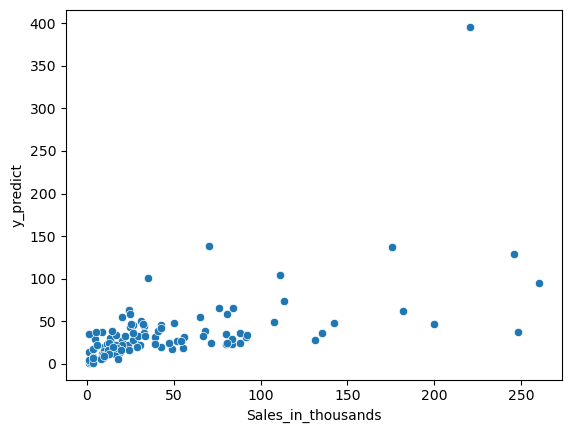

In [89]:
sns.scatterplot(x=train.Sales_in_thousands, y=train.y_predict)

In [90]:
train.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_

In [91]:
test.head(3)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_Sales_in_thousands,y_predict
117,1.872,18.072975,43.000,3.5,253.0,113.3,76.3,165.4,2.850,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.627007,4.298233
75,51.238,18.072975,34.605,3.0,220.0,103.0,71.5,180.1,3.900,17.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.936481,21.881964
51,63.403,14.210000,22.195,4.6,200.0,114.7,78.2,212.0,3.908,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.149511,127.268349


#### Model Validation: Decile Analysis

In [92]:
train['Deciles'] = pd.qcut(train.y_predict, 10,labels = range(1,11))
test['Deciles'] = pd.qcut(test.y_predict, 10, labels = range(1, 11))

In [95]:
train_Deciles = train.groupby('Deciles')[['Sales_in_thousands', 'y_predict']].mean()
test_Deciles = test.groupby('Deciles')[['Sales_in_thousands', 'y_predict']].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_10656\2348710586.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_Deciles = train.groupby('Deciles')[['Sales_in_thousands', 'y_predict']].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_10656\2348710586.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_Deciles = test.groupby('Deciles')[['Sales_in_thousands', 'y_predict']].mean()


In [98]:
train_Deciles

,Sales_in_thousands,y_predict
Deciles,,
1,5.523025,5.306849
2,13.082844,13.001147
3,24.338818,18.362118
4,34.441364,22.735504
5,44.192909,25.937578
6,54.089100,30.902165
7,46.889091,35.689606
8,69.608909,42.431337
9,69.147909,54.029382


In [97]:
test_Deciles

,Sales_in_thousands,y_predict
Deciles,,
1,5.972400,3.573108
2,14.874400,10.524271
3,21.696200,16.121125
4,26.008750,18.498010
5,69.495200,25.382658
6,45.288400,29.884570
7,72.451000,36.118018
8,79.617400,42.647151
9,55.468600,56.451959


#### Other Assumptions of Linear Regression:

###### Mean of residuals/errors must be zero:

* Residuals(or errors) = y_act -  y_pred

In [114]:
m3.resid.mean()

3.065845233139194e-14

##### Residuals/errors of the model should not be correlated with dependant (Y) variable

In [119]:
stats.pearsonr(m3.resid, train.Sales_in_thousands)

(0.5603539776430515, 2.3600062004221277e-10)

##### homoscedasticity of residuals/errors

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


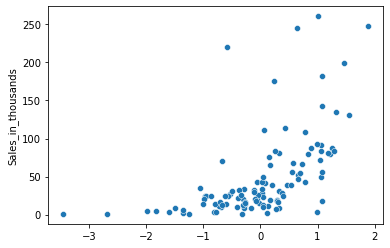

In [122]:
sns.scatterplot(m3.resid, train.Sales_in_thousands)
plt.show()

#### What can be the possible reasons for poor model performance?

1. Small sample 
2. Assumptions of linear/regression modelling are not true for the model in consideration